In [1]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from data_generator import MNIST
from AutoEncoder import AutoEncoder
from sklearn.metrics import accuracy_score
from model import get_model
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
mnist = MNIST('../data/MNIST')
x_train, y_train = mnist.get_train_data()
x_train = x_train / 255.
x_test, y_test = mnist.get_test_data()
x_test = x_test / 255.

x_train, x_t, y_train, y_t = train_test_split(x_train, y_train, test_size=0, random_state=2019)  # 打乱数据
x_test, x_t, y_test, y_t = train_test_split(x_test, y_test, test_size=0, random_state=2019)

In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [21]:
def test_pca(x, y, x_test, y_test):
    """
    :param x
    :param y
    :param x_test
    :param y_test
    :return:
    """
    x = x.reshape(x.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    
    rst = []
    for k in range(1, 100, 1):
        # 构建并训练pca
        pca = PCA(n_components=k)
        pca.fit(x)
        
        x_svm_train = x_test[:2500].copy()
        y_svm_train = y_test[:2500].copy()
        x_svm_test = x_test[2500:].copy()
        y_svm_test = y_test[2500:].copy()
        # 建立分类器
        svc = SVC(gamma='scale')
        # 训练分类器
        svc.fit(pca.transform(x_svm_train), y_svm_train)
        # 使用分类器
        y_pred = svc.predict(pca.transform(x_svm_test))
        print(accuracy_score(y_svm_test, y_pred))
        rst.append(accuracy_score(y_svm_test, y_pred))
    return rst

In [22]:
his1 = test_pca(x_train[:10000], y_train[:10000], x_test[:5000], y_test[:5000])

0.3108
0.4676
0.5124
0.65
0.7588
0.82
0.8548
0.876
0.8848
0.8984
0.9072
0.9188
0.9232
0.9304
0.932
0.9348
0.9368
0.938
0.9436
0.9432
0.9444
0.9464
0.948
0.9484
0.9484
0.9492
0.9488
0.948
0.9468
0.9464
0.948
0.9492
0.9488
0.9496
0.9512
0.9496
0.9508
0.9512
0.9516
0.9516
0.9524
0.952
0.9524
0.952
0.9516
0.9516
0.9516
0.9512
0.9524
0.9516
0.9512
0.9516
0.9512
0.9516
0.9508
0.9516
0.9532
0.9532
0.9532
0.9532
0.9528
0.9528
0.9532
0.9536
0.9524
0.9528
0.9532
0.9532
0.9532
0.9536
0.9536
0.9536
0.954
0.954
0.9528
0.9524
0.9524
0.9512
0.952
0.9516
0.952
0.9512
0.9512
0.9512
0.9516
0.9512
0.9512
0.9516
0.9516
0.9512
0.9512
0.9516
0.9508
0.9516
0.9512
0.9508
0.9516
0.9508
0.9512


In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(his1))], his1, color='black')
plt.xlabel('target dimension')
plt.ylabel('accuracy')
plt.savefig('pca_mnist.png')

In [7]:
def test_ae(x, y, x_test, y_test):
    """
    AE测试
    :param x:
    :param y:
    :param x_test:
    :param y_test:
    :return:
    """
    x = x.reshape(x.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)

    rst = []
    for k in range(1, 100, 1):
        # 构建并训练ae
        ae, encoder = get_model(k)
        ae.fit(x, x, epochs=20, shuffle=False, verbose=0)
        
        x_svm_train = x_test[:2500].copy()
        y_svm_train = y_test[:2500].copy()
        x_svm_test = x_test[2500:].copy()
        y_svm_test = y_test[2500:].copy()
        # 建立分类器
        svc = SVC(gamma='scale')
        # 训练分类器
        svc.fit(encoder.predict(x_svm_train), y_svm_train)
        # 使用分类器
        y_pred = svc.predict(encoder.predict(x_svm_test))
        print(accuracy_score(y_svm_test, y_pred))
        rst.append(accuracy_score(y_svm_test, y_pred))
    return rst

In [8]:
his2 = test_ae(x_train[:10000], y_train[:10000], x_test[:5000], y_test[:5000])

0.2864
0.4644
0.5416
0.6844
0.7684
0.798
0.8264
0.852
0.8752
0.8784
0.8996
0.9076
0.9064
0.9184
0.9168
0.9272
0.926
0.9356
0.9316
0.9296
0.9428
0.9404
0.9364
0.944
0.9376
0.9392
0.9472
0.9432
0.9388
0.9392
0.9464
0.9436
0.9464
0.9424
0.9396
0.946
0.944
0.9484
0.9452
0.9444
0.9508
0.9452
0.944
0.9404
0.946
0.9536
0.9496
0.946
0.946
0.9504
0.9488
0.9504
0.9516
0.9468
0.948
0.9508
0.948
0.9476
0.9492
0.9484
0.9476
0.946
0.9488
0.9504
0.9472
0.9504
0.9508
0.9448
0.9524
0.946
0.9512
0.9472
0.9468
0.9492
0.95
0.948
0.9508
0.9484
0.9476
0.9524
0.9484
0.9504
0.9504
0.9472
0.9536
0.9468
0.948
0.9464
0.9484
0.9512
0.9508
0.948
0.9536
0.95
0.9516
0.9488
0.9488
0.9512
0.95


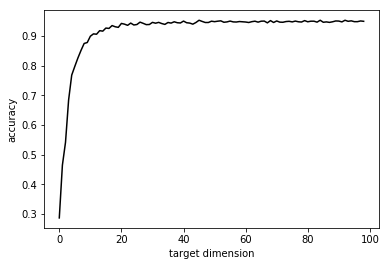

In [9]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(his2))], his2, color='black')
plt.xlabel('target dimension')
plt.ylabel('accuracy')
plt.savefig('ae_mnist.png')